In [135]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 상권

In [136]:
cd_guarantee = pd.read_csv('상권/상권_보증집중도_최종.csv',encoding='euc-kr')
cd_active =pd.read_csv('상권/상권_상권활성도_최종.csv',encoding='euc-kr')

In [137]:
cd_guarantee_col=cd_guarantee[['상권코드','보증집중도','보증집중등급','상가수','보증수']]

In [138]:
cd_merge = pd.merge(left=cd_active,right=cd_guarantee_col,how='left',on='상권코드')

In [139]:
cd_active_score = cd_merge[['상권명','보증집중등급','2206_상대등급']]

In [140]:
cd_active_score

,상권명,보증집중등급,2206_상대등급
0,성남은행초등학교,6,2
1,가림로201번안길,2,3
2,내각1로73번안길,8,4
3,양주산성로,2,10
4,도일로135번길,1,5
...,...,...,...
1672,광명사거리역_4번출구,7,2
1673,성복2로,7,8
1674,광교중앙로,4,5
1675,서수원버스터미널,8,6


In [141]:
#'등급'이라는 글자없애고 int 형으로변환
# cd_active_score['보증집중등급'] = cd_active_score['보증집중등급'].str.replace('등|급','')
# cd_active_score['2206_상대등급'] = cd_active_score['2206_상대등급'].str.replace('등|급','')

In [142]:
# cd_active_score['보증집중등급'] = pd.to_numeric(cd_active_score['보증집중등급'])
# cd_active_score['2206_상대등급'] = pd.to_numeric(cd_active_score['2206_상대등급'])

In [143]:
#보증적정도
cd_active_score['보증적정도'] = cd_active_score['2206_상대등급'] - cd_active_score['보증집중등급']

In [144]:
bins=[]
for i in reversed(range(1,10)):
    bins.append(i)
    
cd_active_score['보증적정등급'] = pd.cut(cd_active_score['보증적정도'],9,labels=bins)

In [145]:
cd_active_score['보증적정도'].value_counts()

#양수 = 활발
#음수 = 부족

 0    188
-2    164
-1    156
 2    124
-4    122
 1    118
-3    117
 3    109
 4     86
-5     75
 6     75
 5     74
-6     70
-7     50
 7     45
 8     37
 9     33
-8     29
-9      5
Name: 보증적정도, dtype: int64

In [150]:
cd_active_score[cd_active_score['보증적정도']==9]

,상권명,보증집중등급,2206_상대등급,보증적정도,보증적정등급
35,동판교로52번길,1,10,9,1
36,부용로185번길,1,10,9,1
62,신길중앙로5길,1,10,9,1
73,안청로2길,1,10,9,1
93,안성대덕우체국,1,10,9,1
214,동탄기흥로257번가길,1,10,9,1
238,한국폴리텍II안성캠퍼스,1,10,9,1
259,아라육로58번길,1,10,9,1
284,삼천병마로_1,1,10,9,1
292,고읍남로39번길,1,10,9,1


<AxesSubplot:>

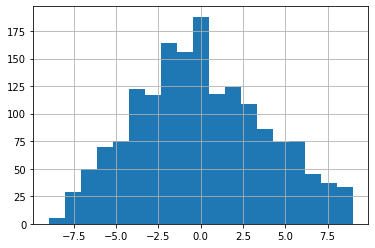

In [146]:
cd_active_score['보증적정도'].hist(bins=19)

In [117]:
def make_rank(active_score):
    if abs(active_score)<=2:
        return '적정'
    elif active_score<-2:
        return '부족'
    elif active_score>2:
        return '과잉'

In [118]:
cd_active_score['보증적정등급'] = cd_active_score['보증적정도'].apply(lambda x:make_rank(x))

In [119]:
cd_active_score['보증적정등급'].value_counts()

적정    750
부족    468
과잉    459
Name: 보증적정등급, dtype: int64

In [120]:
cd_fin = pd.concat([cd_merge,cd_active_score.iloc[:,-2:]],axis=1)

In [121]:
cd_fin.drop(['다중지역정보','업종정보'],axis=1,inplace=True)

In [122]:
cd_fin.to_csv('상권/결과물/상권_보증적정도.csv',encoding='euc-kr',index=False)

# 행정동단위

In [123]:
umd_guarantee = pd.read_csv('행정동/행정동_보증집중도_최종.csv',encoding='euc-kr')
umd_active =pd.read_csv('행정동/행정동_상권활성도_최종.csv',encoding='euc-kr')

In [124]:
umd_active = umd_active.astype({'시군구코드':int})
umd_active.rename(columns={'시군구코드':'행정동코드'},inplace=True)

In [125]:
umd_guarantee_col=umd_guarantee[['행정동코드','보증집중도','보증집중등급','상가수','보증수']]
umd_merge = pd.merge(left=umd_active,right=umd_guarantee_col,how='left',on='행정동코드')
umd_active_score = umd_merge[['SIGUNGU_NM','ADM_DR_NM','보증집중등급','2206_상대등급']]

In [126]:
umd_merge

,WKT,시도,SIGUNGU_NM,ADM_DR_NM,행정동코드,활성화여부,상권유형,상권활성화유형,2206_절대등급,2206_상대등급,경제회복도,업력,보증집중도,보증집중등급,상가수,보증수
0,MULTIPOLYGON (((956144.676799997 1926791.06500...,경기도,수원시 장안구,파장동,41111560,침체,정체,침체-정체,9,8,6,12.667998,0.487013,6.0,924.0,450.0
1,"MULTIPOLYGON (((953430.847600002 1923415.439,9...",경기도,수원시 장안구,율천동,41111566,일반,정체,일반-정체,8,5,6,10.305972,0.486949,6.0,1226.0,597.0
2,"MULTIPOLYGON (((954598.361899999 1923627.5777,...",경기도,수원시 장안구,정자1동,41111571,활성,쇠퇴,활성-쇠퇴,6,3,8,11.754494,0.543294,4.0,589.0,320.0
3,"MULTIPOLYGON (((955513.584699999 1922196.6204,...",경기도,수원시 장안구,정자2동,41111572,활성,쇠퇴,활성-쇠퇴,6,2,7,11.894814,0.439243,7.0,1004.0,441.0
4,"MULTIPOLYGON (((958087.7235 1922275.02,958080....",경기도,수원시 장안구,영화동,41111580,일반,쇠퇴,일반-쇠퇴,7,4,7,14.440856,0.444056,7.0,1430.0,635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,"MULTIPOLYGON (((1022538.551 1954630.9803,10225...",경기도,양평군,청운면,41830370,침체,정체,침체-정체,10,10,7,14.339326,0.244681,10.0,188.0,46.0
544,"MULTIPOLYGON (((1018405.9698 1946478.1428,1018...",경기도,양평군,양동면,41830380,침체,정체,침체-정체,10,9,7,12.270694,0.248588,10.0,177.0,44.0
545,"MULTIPOLYGON (((1011829.8535 1945324.8923,1011...",경기도,양평군,지평면,41830395,침체,정체,침체-정체,9,9,7,11.723183,0.353488,9.0,215.0,76.0
546,"MULTIPOLYGON (((1009252.2599 1953485.9096,1009...",경기도,양평군,용문면,41830400,일반,쇠퇴,일반-쇠퇴,8,6,6,11.936345,0.317848,10.0,1227.0,390.0


In [127]:
# #'등급'이라는 글자없애고 int 형으로변환
# umd_active_score['보증집중등급'] = umd_active_score['보증집중등급'].str.replace('등|급','')
# umd_active_score['2206_상대등급'] = umd_active_score['2206_상대등급'].str.replace('등|급','')
# umd_active_score['보증집중등급'] = pd.to_numeric(umd_active_score['보증집중등급'])
# umd_active_score['2206_상대등급'] = pd.to_numeric(umd_active_score['2206_상대등급'])

In [128]:
#보증적정도
umd_active_score['보증적정도'] = umd_active_score['2206_상대등급'] - umd_active_score['보증집중등급']

bins=[]
for i in reversed(range(1,10)):
    bins.append(i)
    
umd_active_score['보증적정등급'] = pd.cut(umd_active_score['보증적정도'],9,labels=bins)


In [129]:
umd_active_score['보증적정도'].value_counts()

#양수 = 활발
#음수 = 부족

-1.0    61
 0.0    60
-2.0    52
 3.0    46
-3.0    44
 1.0    37
 5.0    37
-5.0    35
 2.0    33
-4.0    33
 4.0    22
-6.0    17
 6.0    17
 8.0    13
-7.0    13
 7.0    12
-8.0     8
 9.0     7
Name: 보증적정도, dtype: int64

In [130]:
umd_active_score['보증적정등급'] = umd_active_score['보증적정도'].apply(lambda x:make_rank(x))
umd_active_score['보증적정등급'].value_counts()

적정    243
과잉    154
부족    150
Name: 보증적정등급, dtype: int64

In [131]:
umd_fin = pd.concat([umd_merge,umd_active_score.iloc[:,-2:]],axis=1)

In [132]:
umd_fin

,WKT,시도,SIGUNGU_NM,ADM_DR_NM,행정동코드,활성화여부,상권유형,상권활성화유형,2206_절대등급,2206_상대등급,경제회복도,업력,보증집중도,보증집중등급,상가수,보증수,보증적정도,보증적정등급
0,MULTIPOLYGON (((956144.676799997 1926791.06500...,경기도,수원시 장안구,파장동,41111560,침체,정체,침체-정체,9,8,6,12.667998,0.487013,6.0,924.0,450.0,2.0,적정
1,"MULTIPOLYGON (((953430.847600002 1923415.439,9...",경기도,수원시 장안구,율천동,41111566,일반,정체,일반-정체,8,5,6,10.305972,0.486949,6.0,1226.0,597.0,-1.0,적정
2,"MULTIPOLYGON (((954598.361899999 1923627.5777,...",경기도,수원시 장안구,정자1동,41111571,활성,쇠퇴,활성-쇠퇴,6,3,8,11.754494,0.543294,4.0,589.0,320.0,-1.0,적정
3,"MULTIPOLYGON (((955513.584699999 1922196.6204,...",경기도,수원시 장안구,정자2동,41111572,활성,쇠퇴,활성-쇠퇴,6,2,7,11.894814,0.439243,7.0,1004.0,441.0,-5.0,부족
4,"MULTIPOLYGON (((958087.7235 1922275.02,958080....",경기도,수원시 장안구,영화동,41111580,일반,쇠퇴,일반-쇠퇴,7,4,7,14.440856,0.444056,7.0,1430.0,635.0,-3.0,부족
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,"MULTIPOLYGON (((1022538.551 1954630.9803,10225...",경기도,양평군,청운면,41830370,침체,정체,침체-정체,10,10,7,14.339326,0.244681,10.0,188.0,46.0,0.0,적정
544,"MULTIPOLYGON (((1018405.9698 1946478.1428,1018...",경기도,양평군,양동면,41830380,침체,정체,침체-정체,10,9,7,12.270694,0.248588,10.0,177.0,44.0,-1.0,적정
545,"MULTIPOLYGON (((1011829.8535 1945324.8923,1011...",경기도,양평군,지평면,41830395,침체,정체,침체-정체,9,9,7,11.723183,0.353488,9.0,215.0,76.0,0.0,적정
546,"MULTIPOLYGON (((1009252.2599 1953485.9096,1009...",경기도,양평군,용문면,41830400,일반,쇠퇴,일반-쇠퇴,8,6,6,11.936345,0.317848,10.0,1227.0,390.0,-4.0,부족


In [133]:
umd_fin.to_csv('행정동/결과물/행정동_보증적정도.csv',encoding='euc-kr',index=False)

In [134]:
umd_fin.iloc[:,1:].to_csv('행정동/결과물/행정동_보증적정도_엑셀열람용.csv',encoding='euc-kr',index=False)